In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os

In [2]:
data_dir = "/Volumes/External_HD/Data/Tensor_Flow_Data/TF_2_Notebooks_and_Data/cell_images"

In [3]:
os.listdir(data_dir)

['test', 'train']

In [4]:
### Training Dor

In [5]:
test_dir = data_dir+"/test/"

In [6]:
os.listdir(test_dir)

['parasitized', 'uninfected']

## Train Dir

In [7]:
train_dir = data_dir+"/train/"

In [8]:
os.listdir(train_dir)

['parasitized', 'uninfected']

## looking at one image

In [9]:
os.listdir(train_dir+"uninfected")[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [10]:
infected_img_path = train_dir+"parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png"

In [11]:
infected_image = imread(infected_img_path)

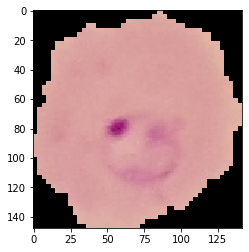

In [12]:
plt.imshow(infected_image)

In [13]:
normal_image_path = train_dir+"uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png"

In [14]:
normal_image = imread(normal_image_path)

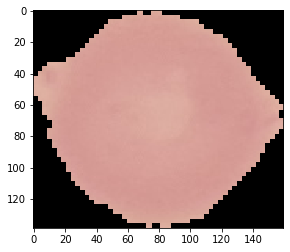

In [15]:
plt.imshow(normal_image)

#### Chcekcing image size

In [16]:
normal_image.shape

(139, 160, 3)

In [17]:
infected_image.shape

(148, 142, 3)

## Appears that our images do not have the same shape so we will need to find the average with and height and use this for our model shape

In [18]:
dim1 = []
dim2 = []

for image_name in os.listdir(test_dir+"uninfected"):
    img = imread(test_dir+"uninfected/"+image_name)
    d1, d2, color_chan = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [19]:
np.mean(dim1)

130.92538461538462

In [20]:
np.mean(dim2)

130.75

## Will set the model shape to be 130X 130

In [21]:
model_shape = (130,130,3)

## Creating the Image Generator

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
imgGen = ImageDataGenerator(
  rotation_range=0.3,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.3,
    zoom_range=0.5,
    fill_mode='nearest',
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1/255,
)

## Testing Image Generator

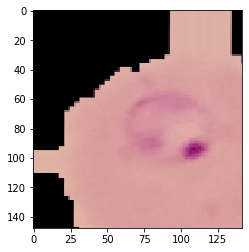

In [24]:
plt.imshow(imgGen.random_transform(infected_image))

#### Creating Model

In [25]:
imgGen.flow_from_directory(train_dir)

Found 24958 images belonging to 2 classes.


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
stop = EarlyStopping(monitor="val_loss", mode="min", patience=6)

In [28]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape = model_shape,
                strides = (1,1), padding = "valid", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(filters = 64, kernel_size = (4,4), input_shape = model_shape,
                strides = (1,1), padding = "valid", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(filters = 64, kernel_size = (4,4), input_shape = model_shape,
                strides = (1,1), padding = "valid", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(units = 128, activation = "relu"))
model.add(Dense(units = 2, activation= "softmax"))
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

## Setting training and testing 

In [29]:
train_gen = imgGen.flow_from_directory(
    train_dir,
    target_size=model_shape[:2],
    color_mode='rgb',
    class_mode='categorical',
    batch_size=6,
    shuffle=True,
)

Found 24958 images belonging to 2 classes.


In [30]:
test_gen = imgGen.flow_from_directory(
     test_dir,
    target_size= model_shape[:2],
    color_mode='rgb',
    class_mode='categorical',
    batch_size=6,
    shuffle=False
)

Found 2600 images belonging to 2 classes.


### fitting the model

In [31]:
model.fit_generator(train_gen, validation_data=test_gen, epochs=12, callbacks=[stop])

Epoch 1/12
4160/4160 [==============================] - 3103s 746ms/step - loss: 0.6937 - accuracy: 0.5018 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/12
4160/4160 [==============================] - 3148s 757ms/step - loss: 0.6932 - accuracy: 0.5008 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 3/12
4160/4160 [==============================] - 3030s 728ms/step - loss: 0.6933 - accuracy: 0.4995 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 4/12
4160/4160 [==============================] - 3026s 727ms/step - loss: 0.6933 - accuracy: 0.4968 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 5/12
4160/4160 [==============================] - 3027s 728ms/step - loss: 0.6932 - accuracy: 0.5015 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/12
4160/4160 [==============================] - 3029s 728ms/step - loss: 0.6932 - accuracy: 0.5019 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/12
4160/4160 [==============================] - 3028s 728ms/step - loss: 0.6933 - accuracy: 0.4999

In [32]:
metrics = pd.DataFrame(model.history.history)

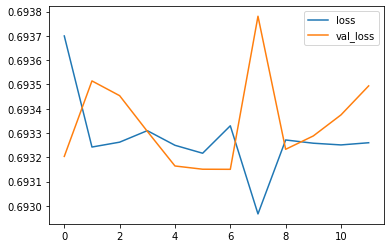

In [33]:
metrics[["loss", "val_loss"]].plot()

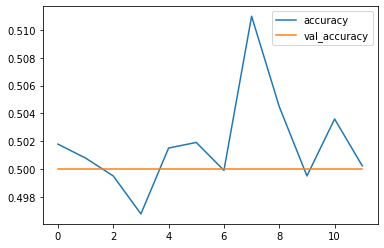

In [34]:
metrics[["accuracy", "val_accuracy"]].plot()

### Predictions

In [35]:
pred = model.predict_generator(test_gen)

In [36]:
pred

array([[0.5124193 , 0.48758066],
       [0.5124193 , 0.48758066],
       [0.5124193 , 0.48758066],
       ...,
       [0.5124193 , 0.48758066],
       [0.5124193 , 0.48758066],
       [0.5124193 , 0.48758066]], dtype=float32)

In [37]:
pred.shape

(2600, 2)

In [38]:
test_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [39]:
from sklearn.metrics import confusion_matrix, classification_report, explained_variance_score

In [40]:
pred_labels = np.argmax(pred, axis = 1)

In [41]:
print(classification_report(test_gen.classes, pred_labels))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1300
           1       0.00      0.00      0.00      1300

    accuracy                           0.50      2600
   macro avg       0.25      0.50      0.33      2600
weighted avg       0.25      0.50      0.33      2600



/Users/berkatbhatti/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
